In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns

In [9]:
df = pd.read_csv("./File/Merged_Bitcoin_FearAndGreed.csv")
df['Date'] = pd.to_datetime(df['Date'])

df['Open'] = df['Open'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)
df['Close'] = df['Close'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)


df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2023-12-31')]

df = df.sort_values('Date')



<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_3008\737574002.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Open'] = df['Open'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_3008\737574002.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Close'] = df['Close'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)


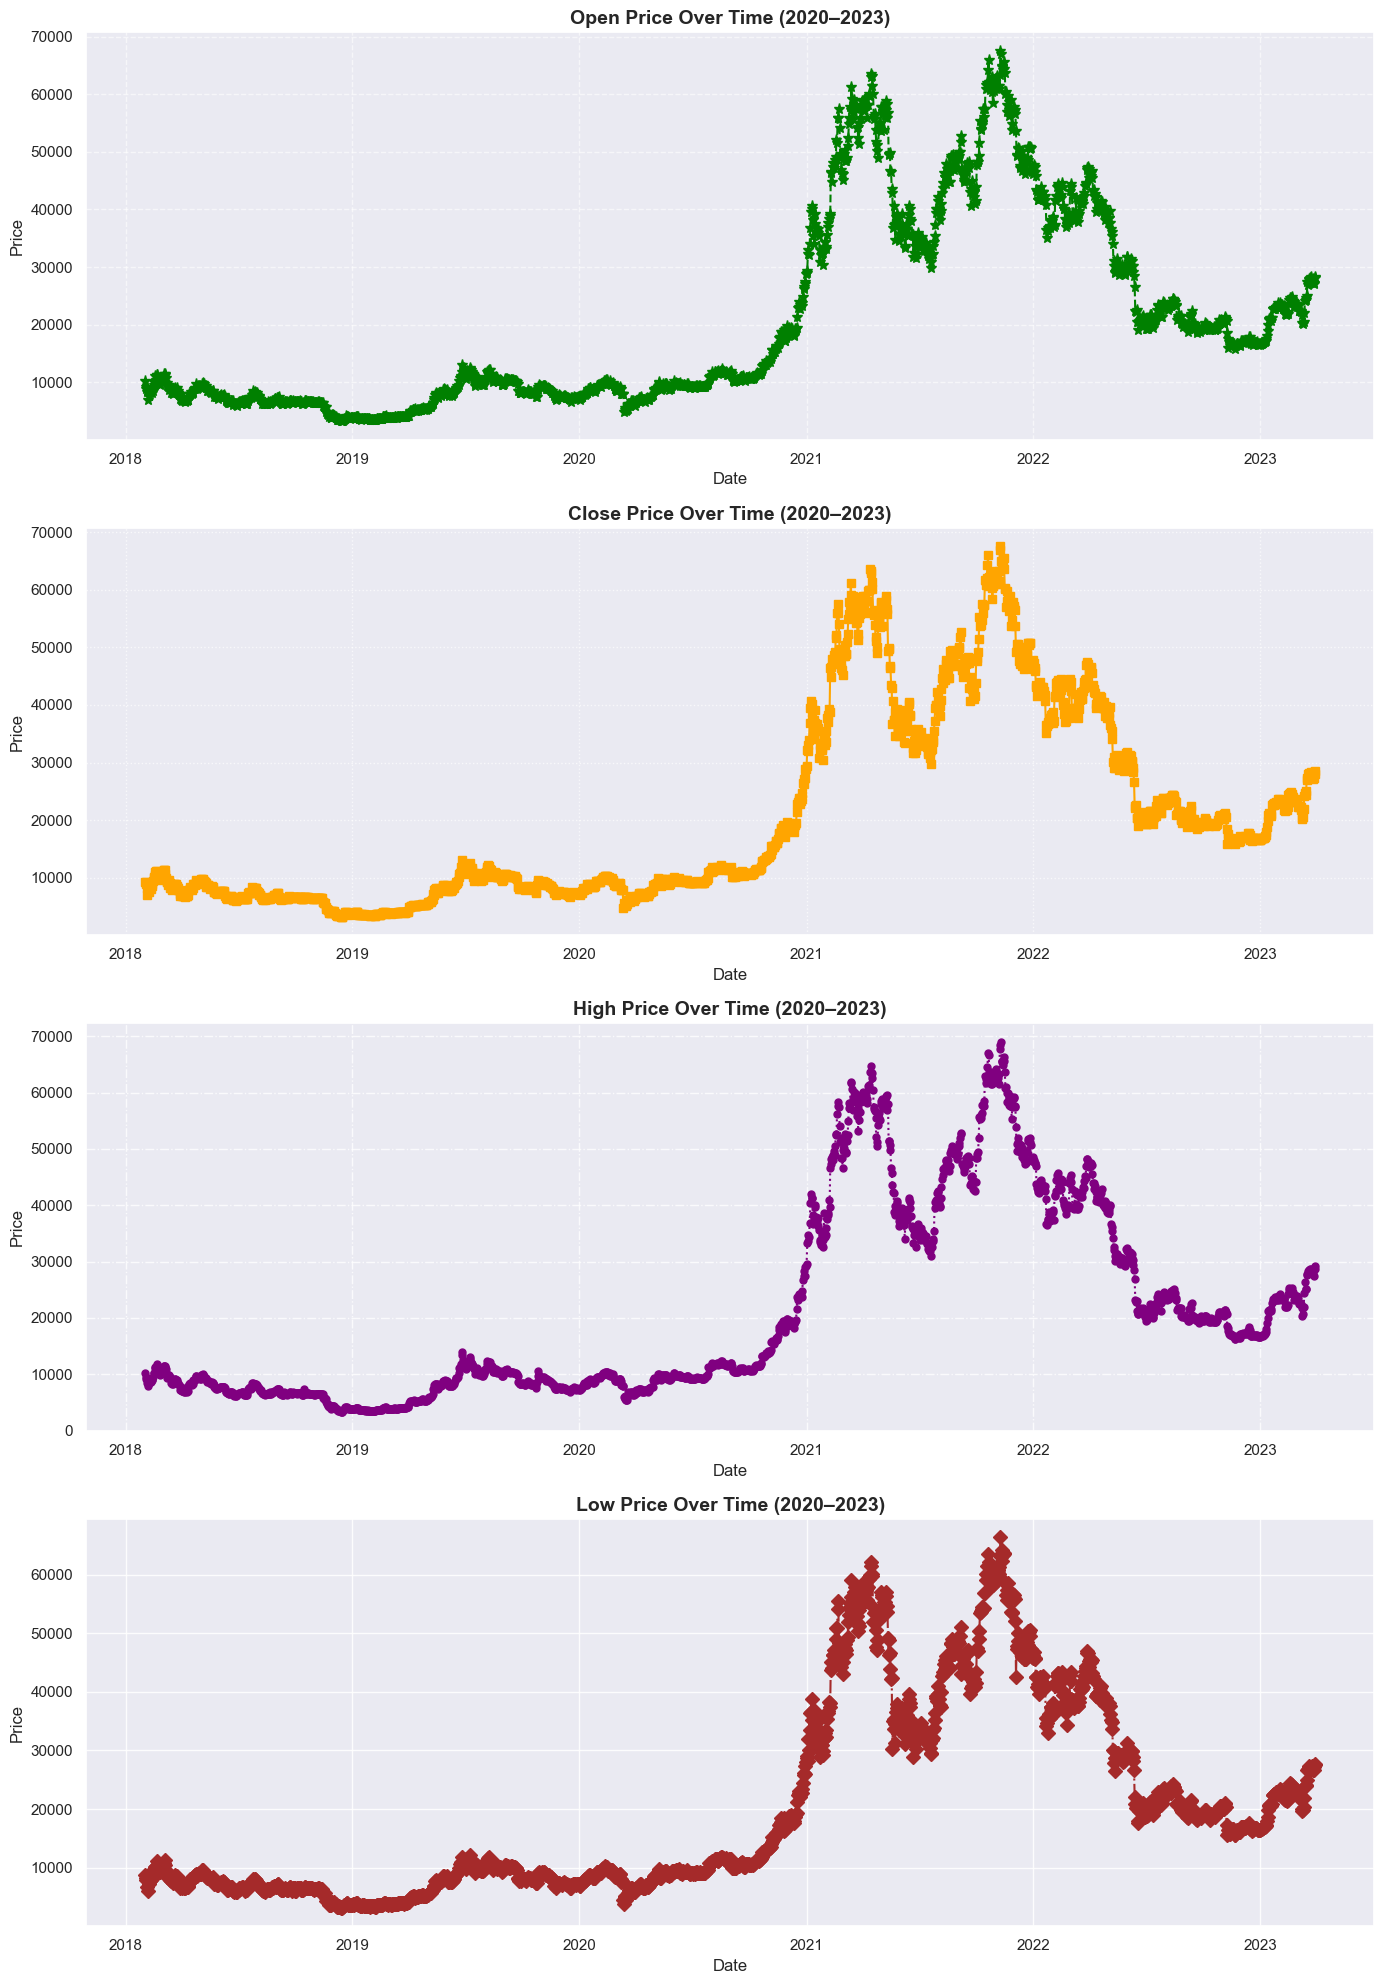

In [10]:

sns.set_style("darkgrid")



fig, axs = plt.subplots(4, 1, figsize=(14, 20), sharex=False)

axs[0].plot(df['Date'], df['Open'], color='green', linestyle="dashed", marker='*', markersize=8)
axs[0].set_title("Open Price Over Time (2020–2023)", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Date", fontsize=12)
axs[0].set_ylabel("Price", fontsize=12)
axs[0].grid(True, linestyle="--", alpha=0.6)

axs[1].plot(df['Date'], df['Close'], color='orange', linestyle="solid", marker='s', markersize=6)
axs[1].set_title("Close Price Over Time (2020–2023)", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Date", fontsize=12)
axs[1].set_ylabel("Price", fontsize=12)
axs[1].grid(True, linestyle=":", alpha=0.7)


axs[2].plot(df['Date'], df['High'], color='purple', linestyle="dotted", marker='o', markersize=5)
axs[2].set_title("High Price Over Time (2020–2023)", fontsize=14, fontweight='bold')
axs[2].set_xlabel("Date", fontsize=12)
axs[2].set_ylabel("Price", fontsize=12)
axs[2].grid(True, linestyle="-.", alpha=0.8)

# Low Price - Dash-dot line, brown color, diamond markers
axs[3].plot(df['Date'], df['Low'], color='brown', linestyle="dashdot", marker='D', markersize=7)
axs[3].set_title("Low Price Over Time (2020–2023)", fontsize=14, fontweight='bold')
axs[3].set_xlabel("Date", fontsize=12)
axs[3].set_ylabel("Price", fontsize=12)
axs[3].grid(True, linestyle="-", alpha=0.9)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


           Date   Close     Open     High     Low  Change  \
1884 2018-02-01  9181.1  10266.2  10303.0  8789.2 -0.1056   
1883 2018-02-02  8893.2   9179.8   9201.4  7915.8 -0.0314   
1882 2018-02-03  9241.1   8894.4   9506.9  8249.3  0.0391   
1881 2018-02-04  8222.2   9241.5   9382.1  7932.1 -0.1103   
1880 2018-02-05  6938.5   8220.8   8383.2  6651.9 -0.1561   

     Change Classification  Value Value_Classification  BTC_Closing  \
1884                  Down   30.0                 Fear  9170.540039   
1883                  Down   15.0         Extreme Fear  8830.750000   
1882                    Up   40.0                 Fear  9174.910156   
1881                  Down   24.0         Extreme Fear  8277.009766   
1880                  Down   11.0         Extreme Fear  6955.270020   

       BTC_Volume  
1884   9959400448  
1883  12726899712  
1882   7263790080  
1881   7073549824  
1880   9285289984  
Change Classification
Up        795
Down      747
Stable    343
Name: count, dtype: in

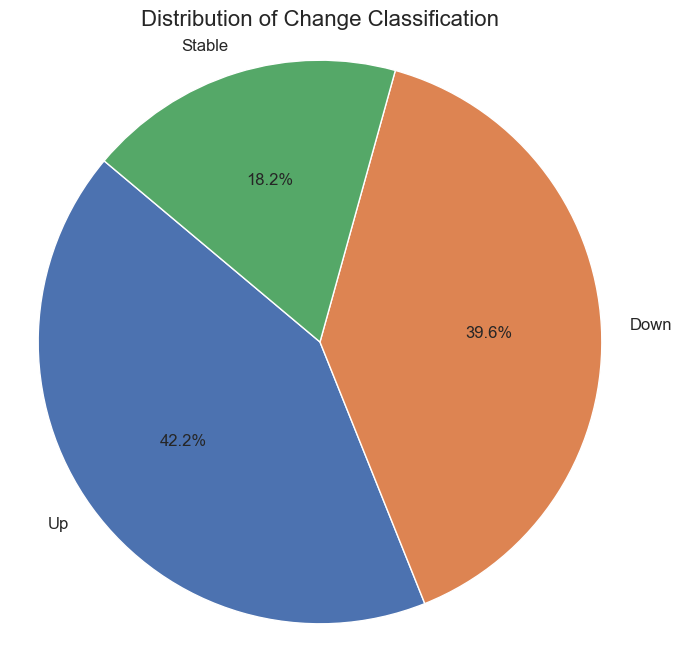

In [4]:

sns.set(style="whitegrid")

# Display the first few rows to verify the data loaded correctly
print(df.head())

# Count the frequency of each classification category
value_counts = df["Change Classification"].value_counts()

print(value_counts)

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))  
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct="%1.1f%%",  
    startangle=140,     
    textprops={'fontsize': 12}
)
plt.title("Distribution of Change Classification", fontsize=16)
plt.axis("equal")  
plt.show()

Value_Classification
Fear             647
Extreme Fear     528
Greed            338
Neutral          187
Extreme Greed    185
Name: count, dtype: int64


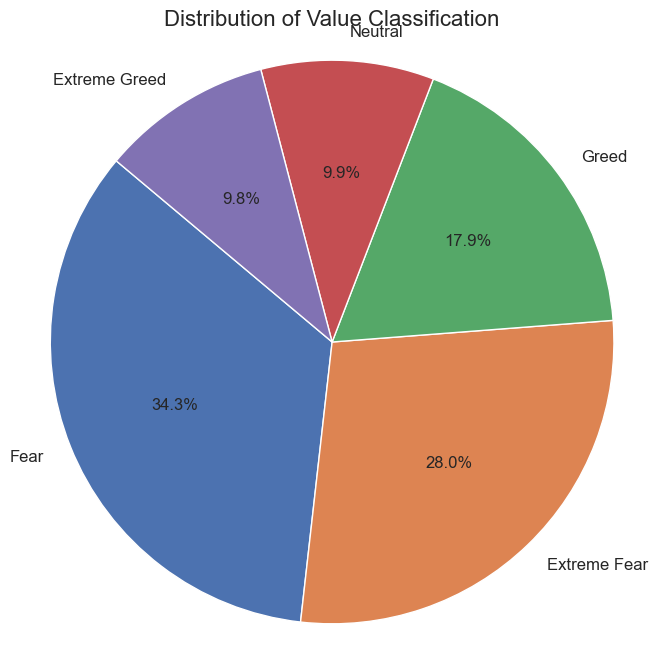

In [5]:

sns.set(style="whitegrid")

# Count the frequency of each classification category
value_counts = df["Value_Classification"].value_counts()

print(value_counts)

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))  
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct="%1.1f%%",  
    startangle=140,     
    textprops={'fontsize': 12}
)
plt.title("Distribution of Value Classification", fontsize=16)
plt.axis("equal")  
plt.show()

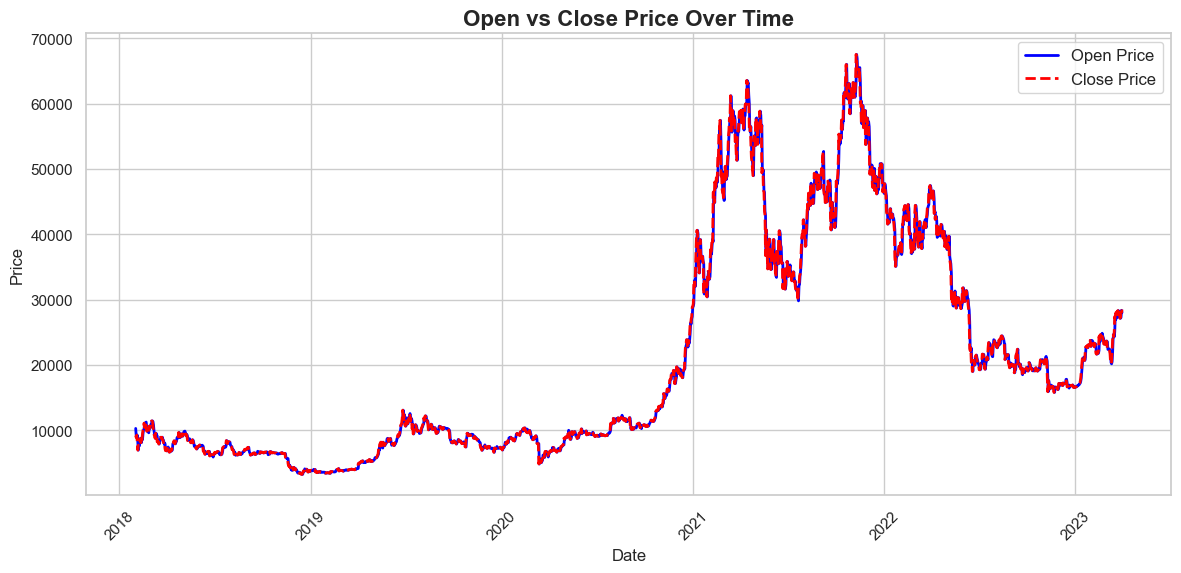

In [6]:

plt.figure(figsize=(14, 6))

# Plot Open price as a blue solid line
plt.plot(df['Date'], df['Open'], color='blue', linestyle='-', linewidth=2, label="Open Price")

# Plot Close price as a red dashed line
plt.plot(df['Date'], df['Close'], color='red', linestyle='--', linewidth=2, label="Close Price")

# Add titles and labels
plt.title("Open vs Close Price Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)


plt.xticks(rotation=45)

plt.legend(fontsize=12)


plt.show()


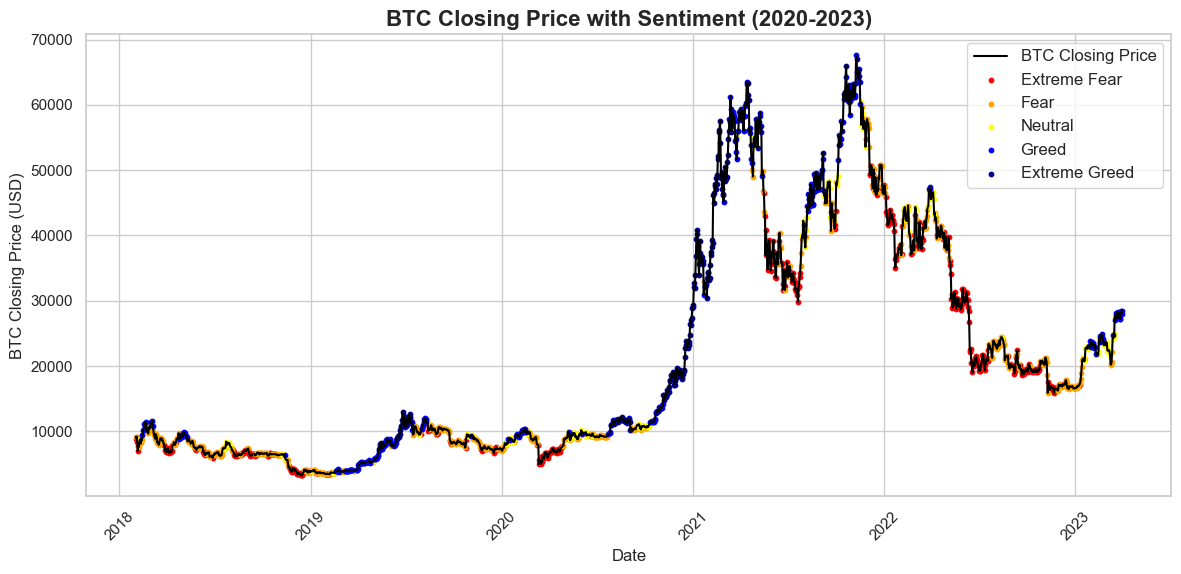

In [7]:


# Define colors for each sentiment category
colors = {
    "Extreme Fear": "red",
    "Fear": "orange",
    "Neutral": "yellow",
    "Greed": "blue",
    "Extreme Greed": "darkblue"
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot BTC Closing Price with black solid line
ax.plot(df['Date'], df['BTC_Closing'], color='black', label="BTC Closing Price")

# Scatter points for sentiment categories
for sentiment, color in colors.items():
    sentiment_data = df[df['Value_Classification'] == sentiment]
    ax.scatter(sentiment_data['Date'], sentiment_data['BTC_Closing'], color=color, label=sentiment, s=10)

ax.set_title("BTC Closing Price with Sentiment (2020-2023)", fontsize=16, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("BTC Closing Price (USD)", fontsize=12)


plt.xticks(rotation=45)


plt.legend(fontsize=12)


plt.show()


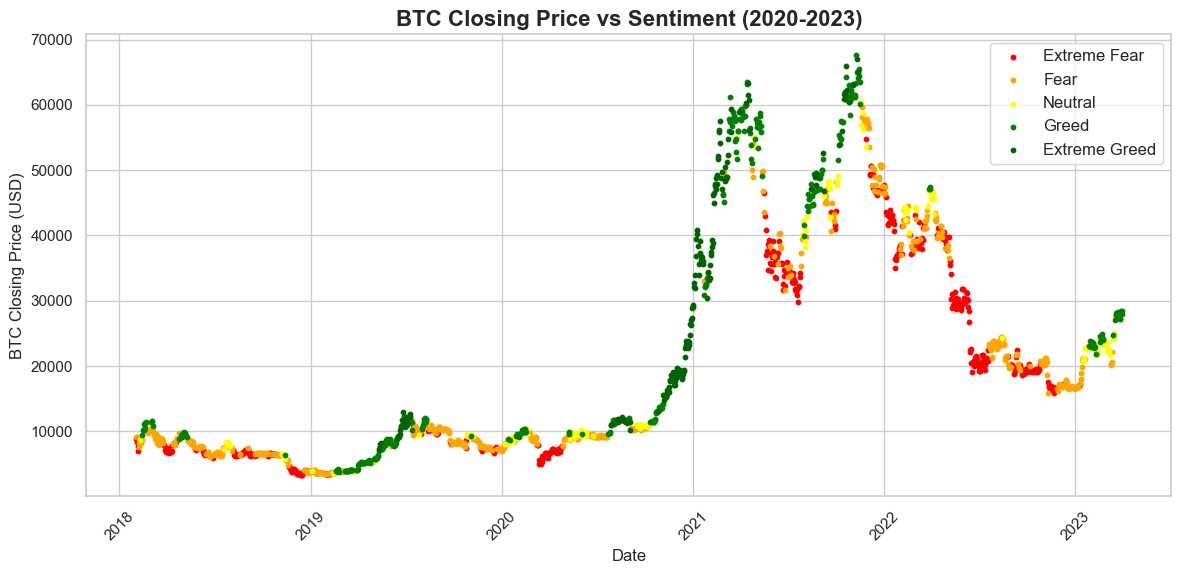

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("./File/Merged_Bitcoin_FearAndGreed.csv")

# Convert 'Date' column to datetime format for better visualization
df['Date'] = pd.to_datetime(df['Date'])

# Define colors for each sentiment category
colors = {
    "Extreme Fear": "red",
    "Fear": "orange",
    "Neutral": "yellow",
    "Greed": "green",
    "Extreme Greed": "darkgreen"
}

# Create figure and axis
plt.figure(figsize=(14, 6))

# Scatter plot for closing price vs sentiment
for sentiment, color in colors.items():
    sentiment_data = df[df['Value_Classification'] == sentiment]
    plt.scatter(sentiment_data['Date'], sentiment_data['BTC_Closing'], color=color, label=sentiment, s=10)

# Add title and labels
plt.title("BTC Closing Price vs Sentiment (2020-2023)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("BTC Closing Price (USD)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Display the graph
plt.show()
